In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
#pd.set_option('display.max_colwidth', -1)
sns.set_theme(style="darkgrid")

DIR_DATASET = r'/Users/dev-rocks/Documents/TCC - Data Science e Big Data/Projeto/datasets/'
# DIR_DATASET = r'C:\Users\Daniel.Vale\Personal\PBDDC\TCC\Projeto_v2\datasets\\'

In [2]:
colunas = ['id','descricaoTipo','anoDataset','statusExtracao',
           'tipoDocumento','tamanhoEmBytes','tema','tokens',
           'qtdTokens','semConteudo']

dfProposicoes = pd.read_csv(f'{DIR_DATASET}proposicoesUnificado.csv', sep=';', low_memory=False,usecols=colunas)


In [3]:
dfProposicoes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149175 entries, 0 to 149174
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              149175 non-null  int64 
 1   descricaoTipo   149175 non-null  object
 2   anoDataset      149175 non-null  int64 
 3   statusExtracao  149175 non-null  int64 
 4   tipoDocumento   149175 non-null  object
 5   tamanhoEmBytes  149175 non-null  int64 
 6   tema            53268 non-null   object
 7   tokens          147784 non-null  object
 8   semConteudo     149175 non-null  bool  
 9   qtdTokens       149175 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 10.4+ MB


In [4]:
df2018 = dfProposicoes.loc[dfProposicoes['anoDataset']==2018]
df2018.info()

df2019 = dfProposicoes.loc[dfProposicoes['anoDataset']==2019]
df2019.info()

df2020 = dfProposicoes.loc[dfProposicoes['anoDataset']==2020]
df2020.info()

df2021 = dfProposicoes.loc[dfProposicoes['anoDataset']==2021]
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20192 entries, 42596 to 62787
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              20192 non-null  int64 
 1   descricaoTipo   20192 non-null  object
 2   anoDataset      20192 non-null  int64 
 3   statusExtracao  20192 non-null  int64 
 4   tipoDocumento   20192 non-null  object
 5   tamanhoEmBytes  20192 non-null  int64 
 6   tema            5097 non-null   object
 7   tokens          19946 non-null  object
 8   semConteudo     20192 non-null  bool  
 9   qtdTokens       20192 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42596 entries, 0 to 42595
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              42596 non-null  int64 
 1   descricaoTipo   42596 non-null  object
 2   anoDataset

,anoDataset,id
0,2018,20192
1,2019,42596
2,2020,40033
3,2021,46354


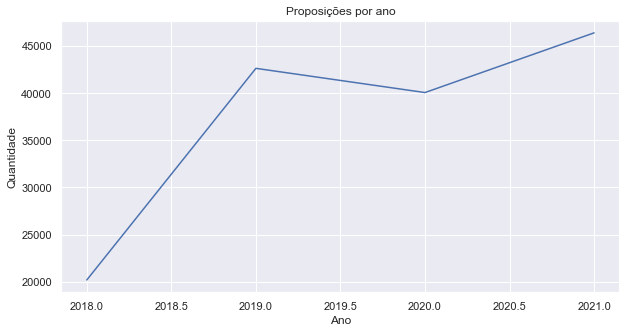

In [5]:
proposicoesPorAno = dfProposicoes.groupby(['anoDataset'], as_index=False)['id'].count()
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x='anoDataset',y='id',data=proposicoesPorAno,markers=True, dashes=False)
ax.set_title('Proposições por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.plot()

proposicoesPorAno

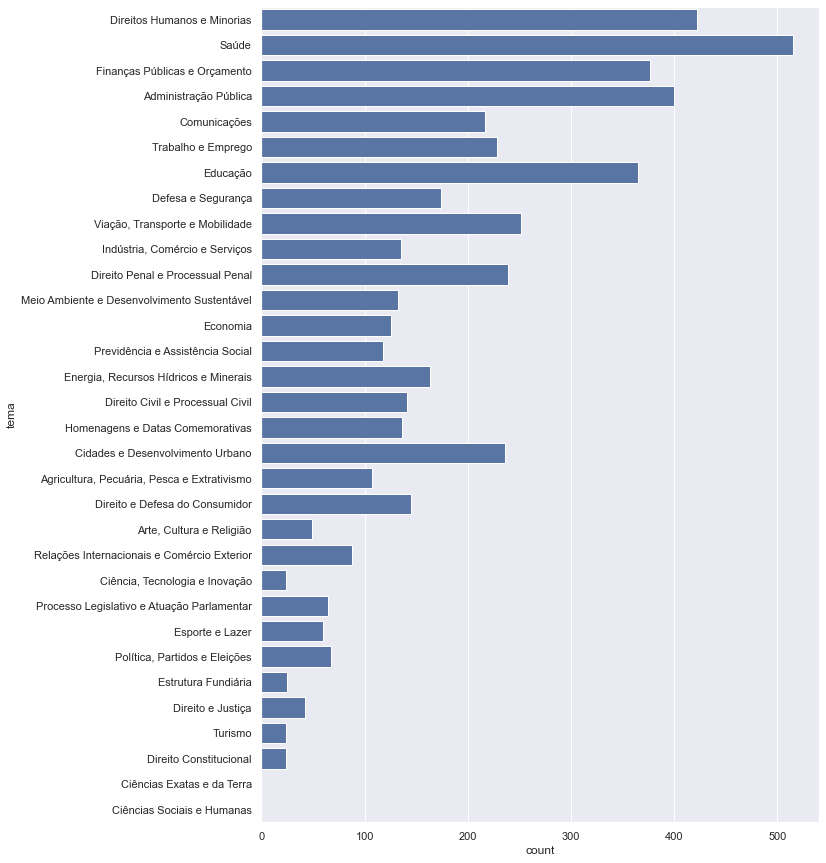

In [6]:
f, ax = plt.subplots(figsize=(10, 15))

ax = sns.countplot( y="tema", data=df2018,
            label="Total", color="b", order=df2021['tema'].value_counts().index)


In [7]:
proposicoesPorAno = dfProposicoes.groupby(['tema','anoDataset'], as_index=False)['id'].count()
temasPorAno = proposicoesPorAno.pivot_table(index='tema',columns='anoDataset',values='id')
temasPorAno.loc[:,'Total'] = temasPorAno.sum(numeric_only=True, axis=1)
temasPorAno.sort_values(by='Total',ascending=False).head(10)


anoDataset,2018,2019,2020,2021,Total
tema,,,,,
Saúde,515.0,1299.0,3089.0,1730.0,6633.0
Direitos Humanos e Minorias,422.0,1252.0,1728.0,1791.0,5193.0
Administração Pública,400.0,1310.0,1987.0,1260.0,4957.0
Finanças Públicas e Orçamento,377.0,992.0,1712.0,1448.0,4529.0
Trabalho e Emprego,228.0,628.0,1331.0,832.0,3019.0
Educação,365.0,975.0,850.0,821.0,3011.0
Defesa e Segurança,174.0,647.0,771.0,618.0,2210.0
"Viação, Transporte e Mobilidade",252.0,793.0,542.0,514.0,2101.0
Direito Penal e Processual Penal,239.0,720.0,621.0,453.0,2033.0


,semConteudo,id
0,False,148186
1,True,989


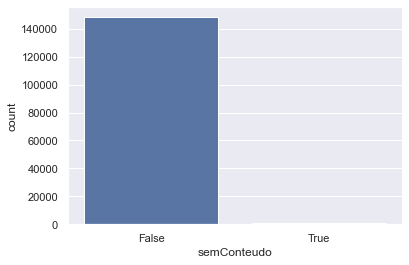

In [8]:
ax = sns.countplot( x="semConteudo", data=dfProposicoes,
            label="Total", color="b")

proposicoesPorConteudo = dfProposicoes.groupby(['semConteudo'], as_index=False)['id'].count()
proposicoesPorConteudo

In [38]:

dfProposicoesClassificadas = dfProposicoes.loc[dfProposicoes['tema'].isna()==False]
dfProposicoesClassificadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53268 entries, 0 to 149154
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              53268 non-null  int64 
 1   descricaoTipo   53268 non-null  object
 2   anoDataset      53268 non-null  int64 
 3   statusExtracao  53268 non-null  int64 
 4   tipoDocumento   53268 non-null  object
 5   tamanhoEmBytes  53268 non-null  int64 
 6   tema            53268 non-null  object
 7   tokens          53268 non-null  object
 8   semConteudo     53268 non-null  bool  
 9   qtdTokens       53268 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 4.1+ MB


In [39]:
dfProposicoesNaoClassificadas = dfProposicoes.loc[dfProposicoes['tema'].isna()==True]
dfProposicoesNaoClassificadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95907 entries, 27 to 149174
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              95907 non-null  int64 
 1   descricaoTipo   95907 non-null  object
 2   anoDataset      95907 non-null  int64 
 3   statusExtracao  95907 non-null  int64 
 4   tipoDocumento   95907 non-null  object
 5   tamanhoEmBytes  95907 non-null  int64 
 6   tema            0 non-null      object
 7   tokens          94516 non-null  object
 8   semConteudo     95907 non-null  bool  
 9   qtdTokens       95907 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 7.4+ MB


In [40]:
print(dfProposicoesClassificadas.groupby(['semConteudo'], as_index=False)['id'].count())


   semConteudo     id
0        False  53268


[]

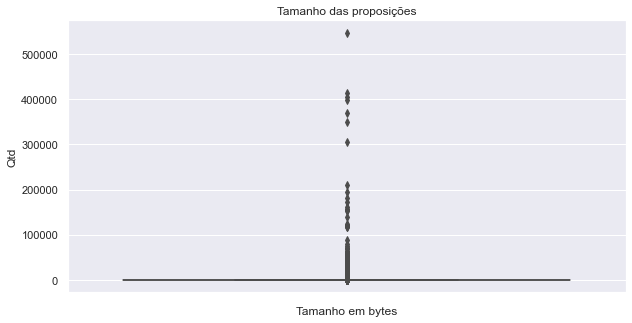

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot( y=dfProposicoes["qtdTokens"])
ax.set_title('Tamanho das proposições')
ax.set_xlabel('Tamanho em bytes')
ax.set_ylabel('Qtd')
ax.plot()